<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/NAND_gate_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import linear_model

In [2]:
my_first_logistic_reg = linear_model.LogisticRegression(penalty='none')

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 1, 1, 0])

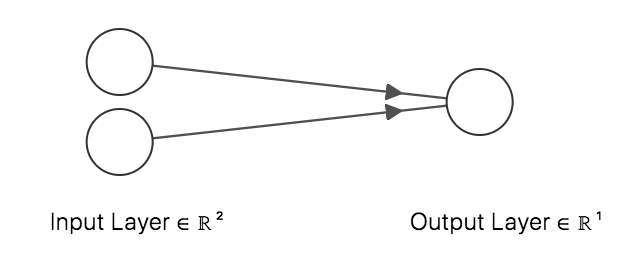

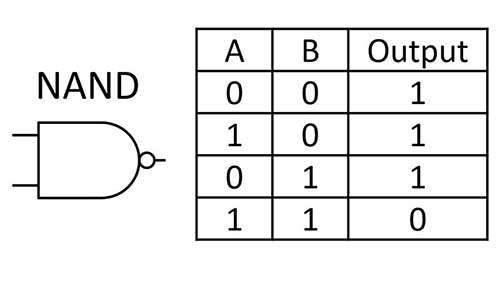

Text(0, 0.5, 'input feature 2')

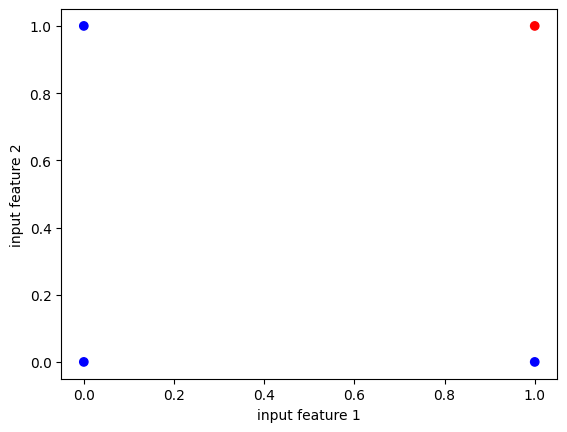

In [4]:
import matplotlib.pyplot as plt
colors=['red' if l==0 else 'blue' for l in y]
scatter=plt.scatter(X[:, 0], X[:, 1], color=colors)
plt.xlabel( 'input feature 1' )
plt.ylabel( 'input feature 2' )

In [5]:
my_first_logistic_reg.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [6]:
# Test the trained model
y_predicted = my_first_logistic_reg.predict(X)
print('Predictions after training: ')
print(y_predicted)

Predictions after training: 
[1 1 1 0]


In [7]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, y_predicted)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 100.0


In [8]:
from sklearn import metrics
cm = metrics.confusion_matrix(y, y_predicted)
print(cm)

[[1 0]
 [0 3]]


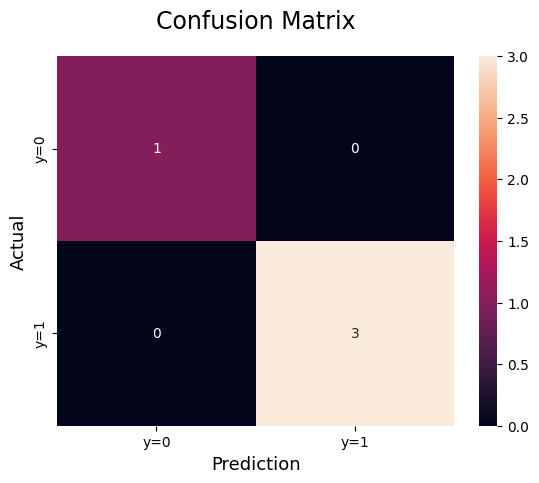

In [9]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['y=0','y=1'], yticklabels=['y=0','y=1'])
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.xlabel('Prediction', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.show()

In [10]:
from sklearn.metrics import classification_report
#print classification report for model
print(classification_report(y, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



Now go back and try XOR gate. Is a linear decision boundary possible for XOR?

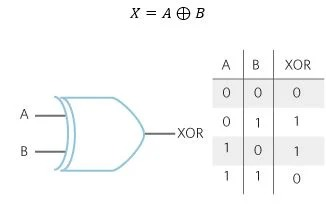